In [52]:
import numpy as np                  # Mathetimatical Operations
import pandas as pd                 # Data manipulation

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
%matplotlib inline

# Sklearn
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score, classification_report, mean_squared_error, confusion_matrix, f1_score, precision_recall_curve, r2_score 
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor

# Scipy
from scipy.stats import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats

# XGBoost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb

# LightGBM
import lightgbm as lgb

# Datetime
import datetime 
import time
from datetime import datetime

# Folium
import folium 
from folium import plugins
from folium.plugins import HeatMap

# Image
from IPython.display import Image

# Bayesian Optimizer
from skopt import BayesSearchCV

# Itertools
import itertools

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

### We will be following the process to solve this problem

1. Data Collection
2. Exploratory Data Analysis
3. Data Cleaning 
4. Feature Engineering 
5. Model Training (including cross validation and hyperparameter tuning)
6. Insights

### 1. Data collection

In [53]:
df = pd.read_csv('Apply_Rate_2019.csv')

### 2. Exploratory Data Analysis

In [54]:
df.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,2018-01-23,-3623880078591607667
4,NaN,NaN,7.868900,0.008065,0.008772,0.0,7.0,0,2018-01-24,-7054510112423797411


In [55]:
# Check the total number of observations in the dataset

print('Total number of observations in the dataset are:',df.shape[0])

Total number of observations in the dataset are: 1200890


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
title_proximity_tfidf          948319 non-null float64
description_proximity_tfidf    948319 non-null float64
main_query_tfidf               1200890 non-null float64
query_jl_score                 1200890 non-null float64
query_title_score              1200890 non-null float64
city_match                     944335 non-null float64
job_age_days                   1200890 non-null float64
apply                          1200890 non-null int64
search_date_pacific            1200890 non-null object
class_id                       1200890 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


#### Observation: 

1. title_proximity_tfidf, description_proximity_tfidf and city_match contains null values
2. There are 7 float type, 2 integer type and 1 object type features

In [57]:
df.drop(['apply'],axis=1).describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,class_id
count,948319.000000,948319.000000,1.200890e+06,1.200890e+06,1.200890e+06,944335.000000,1.200890e+06,1.200890e+06
mean,5.889800,0.096119,1.770301e+00,1.711024e-02,3.580456e-02,0.563676,1.010130e+01,-3.956263e+17
std,9.749672,0.284249,2.237259e+00,1.220871e-02,4.886690e-02,0.495929,1.738912e+01,5.664017e+18
min,0.000000,0.000000,0.000000e+00,1.000000e-06,9.998021e-07,0.000000,0.000000e+00,-9.049388e+18
25%,0.000000,0.000000,0.000000e+00,1.063830e-02,1.256780e-02,0.000000,2.000000e+00,-4.593390e+18
50%,0.000000,0.000000,2.509947e-01,1.578868e-02,2.066189e-02,1.000000,6.000000e+00,-1.614083e+18
75%,11.642839,0.063633,3.423265e+00,2.043710e-02,3.760018e-02,1.000000,1.400000e+01,4.315422e+18
max,93.516720,7.301161,1.774189e+01,2.556893e-01,1.294088e+00,1.000000,1.340000e+03,9.204124e+18


#### Observation:

1. There is notably a large difference between 75th %tile and max values of mostly all the predictors.
2. Median value of 'title_proximity_tfidf', 'description_proximity_tfidf', 'main_query_tfidf', 'query_jl_score', 'query_title_score', 'job_age_days' is lower than mean
3. Thus observation 1 and 2 suggest there are lot of outliers in the data

Number of customers who didnt apply: 1092887
Number of customers who applied: 108003
Percentage of apply to non apply 10.119042989546587 %


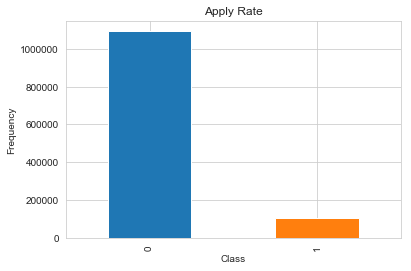

In [58]:
# Lets check the distribution for classes who applied and did not apply

count_classes = pd.value_counts(df['apply'], sort = True)
count_classes.plot(kind = 'bar')

plt.title("Apply Rate")
plt.xticks(range(2))
plt.xlabel("Class")
plt.ylabel("Frequency");

print('Number of customers who didnt apply:',df['apply'].value_counts()[0])
print('Number of customers who applied:',df['apply'].value_counts()[1])
print('Percentage of apply to non apply',df['apply'].value_counts()[0]/df['apply'].value_counts()[1],'%')

#### Observation:

The data is imbalanced and so we might have to use techniques like resmapling (undersampling or oversampling) or use metrics like AUC-ROC curve or AUPRC or SMOTE to handle imbalanced data. Lets explore further which will help us decide what technique should we use. Note: It is already given in the dataset that I have to use AUC as the metric.

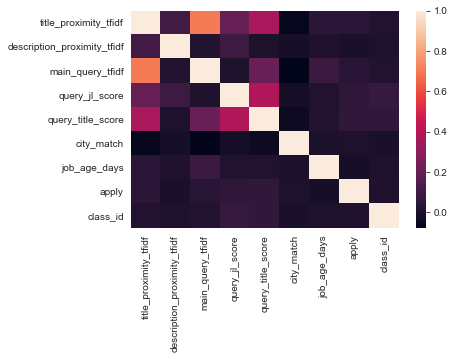

In [59]:
# Lets check the correlation between the features

sns.heatmap(df.corr())

#### Observation: 

1. title_proximity_tfidf and main_query_tfidf are correlated with value of arounf 0.7
2. Other features are not highly correlated

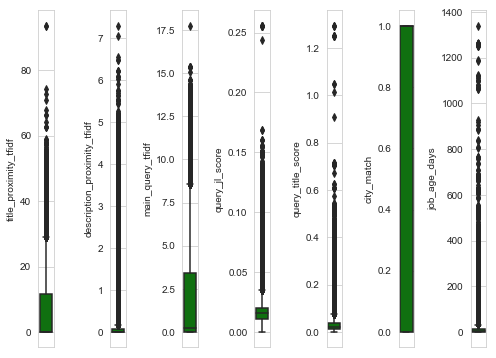

In [60]:
# Check the outliers

l = ['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score',
       'city_match', 'job_age_days']
number_of_columns=7
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

#### Observation:

As we can see there are lot of outliers in the data

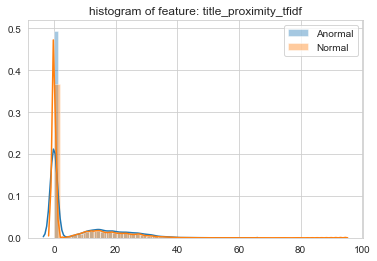

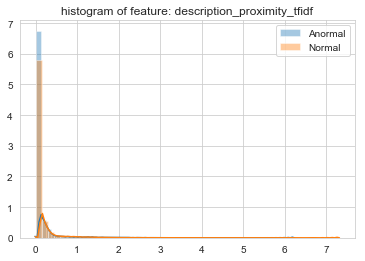

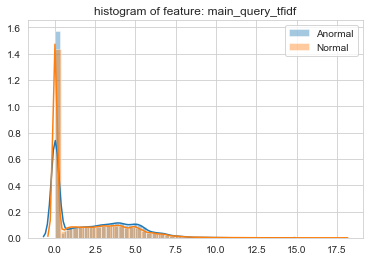

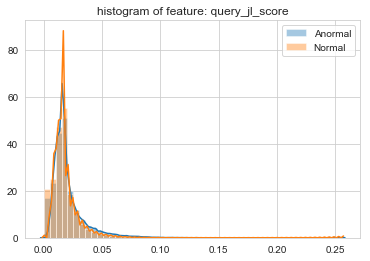

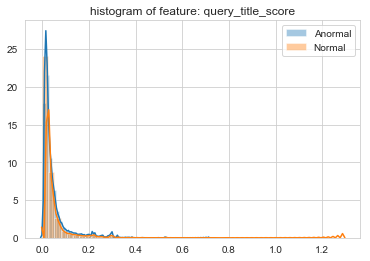

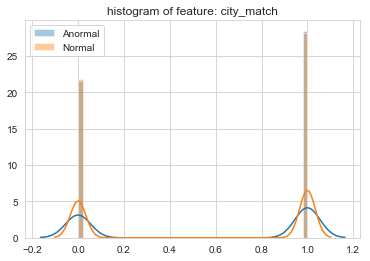

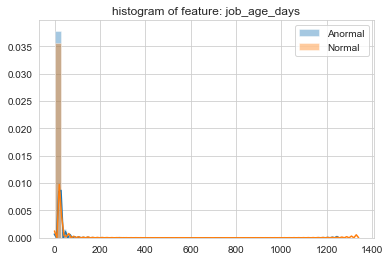

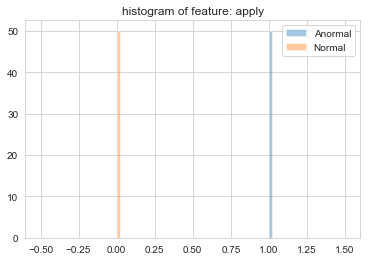

In [61]:
# Check the distribution

# Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness 
# of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

for feature in df.columns[:-2]:
    ax = plt.subplot()
    sns.distplot(df[df['apply'] == 1][feature], bins=50, label='Anormal')
    sns.distplot(df[df['apply'] == 0][feature], bins=50, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()

#### Observation:

For all the features, both apply and non apply rates have almost similar distributions

### 3. Data Cleaning

In [62]:
# Firstly lets drop duplicate entries 

print(df.shape)
df = df.drop_duplicates(keep = 'first')
df.shape

(1200890, 10)


(1114759, 10)

In [63]:
# Check the null values

# To handle missing values, there are various techniques:
   
#    - Listwise deletion
#    - Recover the values
#    - Educated guessing
#    - Average Imputation
#    - Common Point imputation
#    - Regression Substitution
#    - Multiple Imputation
   
# We deal with handling missing values based on the dataset and domain knowledge. Lets see how we can handle 
# the null values here. 

df.isnull().sum()

title_proximity_tfidf          212030
description_proximity_tfidf    212030
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     243469
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [64]:
# Lets check the value counts for the three columns
df['title_proximity_tfidf'].value_counts().head()

0.000000     612554
19.385944        14
23.526310        14
8.866092         14
23.583302        12
Name: title_proximity_tfidf, dtype: int64

In [65]:
df['description_proximity_tfidf'].value_counts().head()

0.000000    510731
1.814926         9
0.012474         8
0.716942         7
0.013397         6
Name: description_proximity_tfidf, dtype: int64

In [66]:
df['city_match'].value_counts().head()

1.0    486385
0.0    384905
Name: city_match, dtype: int64

#### Observation:

The first 2 columns contains mostly value zero so it would be a safe option to impute a value of '0' to the first two columns. For the 'city-match' column, lets check the percentage of apply and non apply before and after we remove the NaN values. If the percentage is same, we can conclude that it is safe to remove rows that have NaN values in City_match column.

In [67]:
df['title_proximity_tfidf'].fillna(0,inplace=True)
df['description_proximity_tfidf'].fillna(0,inplace=True)
df.dropna(subset=['city_match'],inplace=True)

#### Note: I will not be removing outliers since there is possibility of them carrying important information which can help us detect the apply and non apply cases

### 4. Feature Engineering

Below are some of the ways we can perform feature engineering but please note that this is not an exhaustive compendium of all feature engineering because there are limitless possibilities for this step. The good news is that this skill will naturally improve as you gain more experience.
1. Infuse domain knowledge
2. Create interactive features
3. Combine sparse classes
4. Add dummy variables
5. Remove unused features

In our case, since there is not much domain knowledge about the dataset, we are restricted in our application of feature engineering. The only feature engineering that I have applied is multiplying the two features which were correlated to create a new column named main title tfidf

In [68]:
# From the correlation graph, we observed that title_proximity_tfidf and main_query_tfidf are quite correlated, 
# lets merge them and get a single feature by multiplying both of them

df['main_title_tfidf'] = df['title_proximity_tfidf']*df['main_query_tfidf']

In [69]:
df = df.drop(['title_proximity_tfidf','main_query_tfidf'], axis=1)

### 5. Modeling

#### Splitting the dataset into training and testing

In [70]:
# Splitting the dataset by date
train = df.loc[df['search_date_pacific']<'2018-01-27']
test = df.loc[df['search_date_pacific'] == '2018-01-27']

In [71]:
# Drop the unnecessary columns
train.drop(['search_date_pacific','class_id'],axis=1,inplace = True)
test.drop(['search_date_pacific','class_id'],axis=1,inplace = True)

In [72]:
# Drop irrelevant features
X = df.drop(['search_date_pacific','class_id','apply'],axis=1)
y = df['apply']

In [73]:
# Reset the index
X = X.reset_index(drop='index')
y = y.reset_index(drop='index')

In [74]:
X_train = train.drop(['apply'],axis=1)
y_train = train['apply']
X_test = test.drop(['apply'],axis=1)
y_test = test['apply']

In [75]:
# Define a function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [76]:
# Define a function which will be used to get the important parameters like AUC, Classification report

def report(test_set, predictions,labels,title):
    print('F1 score is:', f1_score(test_set,predictions))
    print("AUC-ROC is: %3.2f" % (roc_auc_score(test_set, predictions)))
    plot_confusion_matrix(confusion_matrix(test_set, predictions),labels,title)
    
    #plot the curve
    fpr, tpr, threshold = roc_curve(test_set,predictions)
    auc = roc_auc_score(test_set,predictions)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='Model - AUC = %0.3f'% auc)
    ax.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--', label='Chance')
    ax.legend()
    ax.set_xlim([-0.1,1.0])
    ax.set_ylim([-0.1,1.01])
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    plt.show()

## Hyperparameter tuning and CV using Bayesian Optimizer

Search for parameters of machine learning models that result in best cross-validation performance is necessary in almost all practical cases to get a model with best generalization estimate. A standard approach in scikit-learn is using GridSearchCV class, which takes a set of values for every parameter to try, and simply enumerates all combinations of parameter values. The complexity of such search grows exponentially with the addition of new parameters. A more scalable approach is using RandomizedSearchCV, which however does not take advantage of the structure of a search space.

Scikit-optimize provides a drop-in replacement for GridSearchCV, which utilizes Bayesian Optimization where a predictive model referred to as "surrogate" is used to model the search space and utilized to arrive at good parameter values combination as soon as possible.

In [77]:
# Define a function to print the status during bayesian hyperparameter search

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))



### A.  XGBoost 

In [30]:
# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 10
TRAINING_SIZE = 100000 
TEST_SIZE = 25000


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)


In [31]:
result = bayes_cv_tuner.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.5705
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

Model #2
Best ROC-AUC: 0.5764
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.0005266983003701547, 'reg_lambda': 276.5424475574225, 'scale_pos_weight': 0.3016410771843142, 'subsample': 0.9923710598637134}

Model #3
Best ROC-AUC: 0.5764
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, '

#### Use the tuned parameters to make the predictions

#### Note: For the predictions, because we are measuring ROC AUC and not accuracy, we have the model predict probabilities and not hard binary values.

In [93]:
xgb = XGBClassifier(colsample_bylevel= 0.8390144719977516, colsample_bytree= 0.8844821246070537, 
                    gamma= 4.358684608480795e-07, learning_rate= 0.7988179462781242, max_delta_step= 17, 
                    max_depth= 3, min_child_weight= 1, n_estimators= 68, reg_alpha= 0.0005266983003701547, 
                    reg_lambda= 276.5424475574225, scale_pos_weight= 0.3016410771843142, subsample= 0.9923710598637134)

xgb.fit(X_train, y_train)
preds_xgb = xgb.predict_proba(X_test)[:, 1]
labels = ['No Apply', 'Apply']
xgb_roc_auc = roc_auc_score(y_test, preds_xgb)

print('The baseline AUC score on the test set is {:.4f}.'.format(xgb_roc_auc))

The baseline AUC score on the test set is 0.5819.


### B. Random Forest

In [79]:
# ITERATIONS = 10 # 1000
# TRAINING_SIZE = 100000 # 20000000
# TEST_SIZE = 25000
# # Classifier
# bayes_cv_tuner = BayesSearchCV(
#     estimator = RandomForestClassifier(
#         n_jobs = -1
#     ),
#     search_spaces = {
#     'min_samples_split': [3, 5, 8, 10, 20], 
#     'n_estimators' : [100, 500],
#     'max_depth': [3, 5, 8, 10, 15],
#     'max_features': [3, 5, 6]
# },    
#     scoring = 'roc_auc',
#     cv = StratifiedKFold(
#         n_splits=3,
#         shuffle=True,
#         random_state=42
#     ),
#     n_jobs = 3,
#     n_iter = ITERATIONS,   
#     verbose = 0,
#     refit = True,
#     random_state = 42
# )

In [80]:
# result = bayes_cv_tuner.fit(X, y, callback=status_print)

In [81]:
# rf = RandomForestClassifier(
#     n_estimators=421, 
#     max_depth=15,
#     max_features=3,
#     min_samples_split=8, 
#     class_weight="balanced",
#     bootstrap=True,
#     criterion='entropy',
#     random_state=100
#     )

# rf.fit(X_train, y_train)
# preds_rf = rf.predict_proba(X_test)[:,1]
# #labels = ['No Apply', 'Apply']
# #report(y_test, preds_rf,labels, 'Confusion Matrix')
# auc = roc_auc_score(y_test, preds_rf)

# print('The baseline score on the test set is {:.4f}.'.format(auc))

### C. LightGBM

In [82]:
# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 10
TRAINING_SIZE = 100000 
TEST_SIZE = 25000


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        n_jobs = 1,
        objective = 'binary',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100)
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)


In [83]:
result = bayes_cv_tuner.fit(X, y, callback=status_print)

Model #1
Best ROC-AUC: 0.5744
Best params: {'colsample_bytree': 0.4160029192647807, 'learning_rate': 0.28539836866041823, 'max_depth': 47, 'min_child_weight': 2, 'n_estimators': 84, 'reg_alpha': 5.3341803151229125e-06, 'reg_lambda': 1.626207721332136e-05, 'subsample': 0.7421091918485163}

Model #2
Best ROC-AUC: 0.5744
Best params: {'colsample_bytree': 0.4160029192647807, 'learning_rate': 0.28539836866041823, 'max_depth': 47, 'min_child_weight': 2, 'n_estimators': 84, 'reg_alpha': 5.3341803151229125e-06, 'reg_lambda': 1.626207721332136e-05, 'subsample': 0.7421091918485163}

Model #3
Best ROC-AUC: 0.5744
Best params: {'colsample_bytree': 0.4160029192647807, 'learning_rate': 0.28539836866041823, 'max_depth': 47, 'min_child_weight': 2, 'n_estimators': 84, 'reg_alpha': 5.3341803151229125e-06, 'reg_lambda': 1.626207721332136e-05, 'subsample': 0.7421091918485163}

Model #4
Best ROC-AUC: 0.5749
Best params: {'colsample_bytree': 0.8142720284737898, 'learning_rate': 0.022066991249460103, 'max_de

In [94]:
Lgb = lgb.LGBMClassifier(colsample_bytree=0.8015579071911014, learning_rate=0.07517239253342656, 
                           max_depth=26, min_child_weight=4, n_estimators=95, reg_alpha=0.002839751649223172, 
                           reg_lambda=0.0001230656555713626, subsample=0.653781260730285)

Lgb.fit(X_train, y_train)
preds_lgb = Lgb.predict_proba(X_test)[:, 1]
labels = ['No Apply', 'Apply']
lgb_roc_auc = roc_auc_score(y_test, preds_xgb)

print('The baseline AUC score on the test set is {:.4f}.'.format(lgb_roc_auc))


The baseline AUC score on the test set is 0.5819.


## Applying Stacking 

In [85]:
eclf = VotingClassifier(estimators=[('xgb',xgb),('lgb',Lgb)], voting='soft', weights=[1,1])

In [86]:
eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb', XGBClassifier(base_score=0.5, booster='gbtree',
       colsample_bylevel=0.8390144719977516,
       colsample_bytree=0.8844821246070537, gamma=4.358684608480795e-07,
       learning_rate=0.7988179462781242, max_delta_step=17, max_depth=3,
       min_child_weight=1, missing=None, ...ent=True,
        subsample=0.653781260730285, subsample_for_bin=200000,
        subsample_freq=0))],
         flatten_transform=None, n_jobs=None, voting='soft',
         weights=[1, 1])

In [90]:
preds_eclf = eclf.predict_proba(X_test)[:,1]

eclf_roc_auc = roc_auc_score(y_test, preds_eclf)

print('The baseline AUC score on the test set is {:.4f}.'.format(eclf_roc_auc))


The baseline AUC score on the test set is 0.5848.


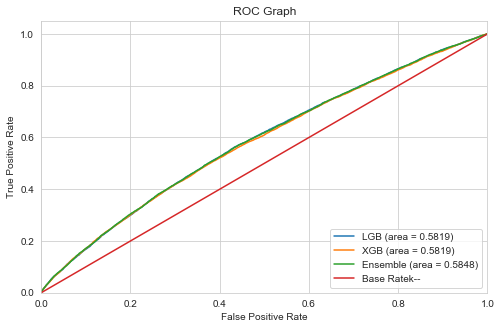

In [95]:
from sklearn.metrics import roc_curve

lgb_fpr, lgb_tpr, lgb_thresholds = roc_curve(y_test, Lgb.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
eclf_fpr, eclf_tpr, eclf_thresholds = roc_curve(y_test, eclf.predict_proba(X_test)[:,1])



plt.figure(figsize=(8,5))


# Plot LGB Classifier ROC
plt.plot(lgb_fpr, lgb_tpr, label='LGB (area = %0.4f)' % lgb_roc_auc)

# Plot XGB classifier ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGB (area = %0.4f)' % xgb_roc_auc)

# Plot Ensemble classifier ROC
plt.plot(eclf_fpr, eclf_tpr, label='Ensemble (area = %0.4f)' % eclf_roc_auc)



# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()